## 定义LeNet-5网络

# LeNet-5网络仿真实现

## LeNet-5网络架构介绍

`LeNet-5`网络架构如下图所示，不包括输入层的话，`LeNet-5`一共有7层，所有的层都有可以训练的参数(权重).
![](../imgs/lenet5.png)
输入的图像是  $32\times32$ 尺寸的点阵图，这比用于训练的数据库中的最大的字符还要大(数据库中的大多数数据尺寸在 $20\times20$​​​​)。这样做的原因是期望识别到潜在的区别特征，例如笔划终点或转角可以出现在最高水平特征检测器的感受野的中心。在 $32\times32$​的输入数据中，LeNet-5网络的最后一层卷积层的感受野中心形成 $20\times20$​的区域。

输入的数据经过归一化，白色的点在-0.1，黑色的点在1.175，这样让输入的平均值在0左右，方差在1左右，可以加速学习。


这个网络架构虽然比较小，但是也包含了深度学习的主要的基本模块：

### input layer

数据输入层，将输入图像尺寸统一并归一化为 $32\times32$

### c1卷积层(convolutional layer)

* 输入：$32 \times 32$

* 卷积核大小：$5\times5, s=1$​

* 卷积种类：6

* 神经元数量：$28\times28\times6$

* 可训练参数：$(5\times5+1)\times6=156$​ 

  > 每个滤波器 $5\times5=25$​个`unit`参数和一个`bias`参数，一共6个滤波器

* 连接数：$(5\times5+1)\times6\times28\times28=122304$​

  > 卷积层`C1`内的每个像素都与输入图像中的 $5\times5$​个像素和1个bias有连接，所以总共有 $156\times28\times28=12304$​ 个连接点

> 对输入图像进行第一次卷积运算（使用 6 个大小为 $5\times5$​​​​ 的卷积核），得到6个`C1`特征图（6个大小为$28\times28$​​的 `feature maps`, 32-5+1=28）。我们再来看看需要多少个参数，卷积核的大小为$5\times5$​​，总共就有$6\times(5\times5+1)=156$​​​个参数，其中+1是表示一个核有一个`bias`。对于卷积层`C1`，`C1`内的每个像素都与输入图像中的$5\times5$​​个像素和1个`bias`有连接，所以总共有$156\times28\times28=122304$​​​个连接（connection）。有122304个连接，但是我们只需要学习156个参数，主要是通过权值共享实现的。

### S2池化层(sub-sampS2ling layer)

* 输入：$28\times28$
* 采样区域：$2\times2$
* 采样方式：4个输入相加，乘以一个可训练参数，再加上一个可训练偏置。结果通过`sigmoid`函数
* 采样种类：6
* 输出`featureMap`大小：$14\times14(28/2)$​
* 神经元数量：$14\times14\times6$​
* 可训练参数：$2\times6$​(和的权+偏置)
* 连接数：$(2\times2+1)\times6\times14\times14$​
* `S2`中每个特征图的大小是`C1`中特征图大小的1/4。

> 第一次卷积之后紧接着就是池化运算，使用 $2\times 2$​​​核进行池化，于是得到了`S2`，6个$14\times14$​​​​的特征图（28/2=14）。`S2`这个pooling层是对C1中的 $2\times2$​​​​ 区域内的像素求和乘以一个权值系数再加上一个偏置，然后将这个结果再做一次映射。于是每个池化核有两个训练参数，所以共有2x6=12个训练参数，但是有5x14x14x6=5880个连接。

### C3卷积层(convolutional layer)

* `S2`中所有6个或者几个特征`map`组合
* 卷积核大小：$5\times5$
* 卷积核种类：16
* 输出`featureMap`大小：$10\times10(14-5+1)=10$

![](../imgs/table1.png)

`C3`中的每个特征`map`是连接到`S2`中的所有6个或者几个特征`map`的，表示本层的特征`map`是上一层提取到的特征`map`的不同组合。存在的一个方式是：`C3`的前6个特征图以`S2`中3个相邻的特征图子集为输入。接下来6个特征图以`S2`中4个相邻特征图子集为输入。然后的3个以不相邻的4个特征图子集为输入。最后一个将`S2`中所有特征图为输入。则：可训练参数：
$$
6\times(3\times5\times5+1)+6\times(4\times5\times5+1)+3\times(4\times5\times5+1)+\times(6\times5\times5+1)=1516
$$
这种非对称的连接的作用是：

* 非完全连接的方案可以使连接数保持在合理的范围内
* 不同的特征图因为有不同的特征可以提取多种组合

### S4池化层(sub-sampling layer)

* 输入：$10\times10$
* 采样区域：$2\times2$
* 采样方式：4个输入相加，乘以一个可训练参数，再加上一个可训练偏置。结果通过`sigmoid`
* 采样种类：16
* 输出`featureMap`大小：$5\times5$
* 神经元数量：$5\times5\times16=400$
* 可训练参数：$2\times16=32$
* 连接数：$16\times(2\times2+1)\times5\times5=2000$​
* `S4`中每个特征图的大小是`C3`中特征图大小的1/4

> `S4`是`pooling`层，窗口大小仍然是$2\times2$​​​，共计16个`feature map`，`C3`层的16个$10\times10$​​​的图分别进行以$2\times2$​​​为单位的池化得到16个 $5\times5$​​​ 的特征图。这一层有2x16共32个训练参数，$5\times5\times5\times16=2000$​​ 个连接。连接的方式与`S2`层类似。

### C5卷积层(convolutional layer)

* 输入：`S4`层的全部16个单元`featureMap`(与`S4`全相连)
* 卷积核大小：$5\times5$
* 卷积核种类：120
* 输出`featureMap`大小：$1\times1(5-5+1)$
* 可训练参数/连接：$120\times(16\times5\times5+1)=48120$

> `C5`层是一个有120个`featureMap`的卷积层。每一个单元和`S4`的所有16个`featureMap`的 $5\times 5$​ 邻域全连接。因为`S4`的`featureMap`是 $5 \times 5$ ，所以`C5`的`featureMap`是 $1\times1$ 。

### F6全连接层(fully-ocnnected layer)

* 输入：`C5` 120维向量
* 计算方式：计算输入向量和权重向量之间的点积，再加上一个偏置，结果通过`sigmoid`函数输出。
* 可训练参数：$84\times(120+1)=10164$

包含84个节点，对应于一个 $7\times12$ 的比特图，$-1$ 表示白色， $1$​ 表示黑色，这样每个符号的比特图的黑白色就对应于一个编码。

![](../imgs/fig3.png)

### output layer

最后，输出层由欧几里得径向基函数(Euclidean Radial Basis Function)组成，也是全连接层。共有10个节点，分别表示0到9，对于每个`RBF`单元$y_i$的输出：
$$
y_i = \sum_j(x_j-w_{ij})^2
$$

### 总结

现在的大多数神经网络是通过`softmax`函数输出多分类结果，相比于现代版本，这里得到的神经网络会小一些，只有约6万个参数，现在的一些神经网络甚至有一千万到一亿个参数。

从`LeNet-5`网络从左往右看，随着网络越来越深，图像的高度和宽度都在缩小，从最初的 $32\times32$​ 缩小到 $28\times28$​，再到 $14\times14$​、$10\times10$​，最后只用 $5\times5$​，与此同时，随着网络层次的加深，通道数量一直在增加，从1增加到6个，再到16个。

LeNet5网络的特别之处还在于，各个网络之间是有关联的，比如说，你有一个$nH\times nW\times nC$​​ 的网络，有$nC$​​个通道，使用尺寸为$𝑓 × 𝑓 × 𝑛 𝐶 $​的过滤器，每个过滤器的通道数和它上一层的通道数相同。这是由于在当时，计算机的运行速度非常慢，为了减少计算量和参数，经典的 `LeNet-5 `网络使用了非常复杂的计算方式，每个过滤器都采用和输入模块一样的通道数量。

## LeNet-5网络定义

In [1]:
from collections import OrderedDict
import torch.nn as nn
class C1(nn.Module):
    def __init__(self):
        super(C1, self).__init__()

        self.c1 = nn.Sequential(OrderedDict([
            ('c1', nn.Conv2d(1, 6, kernel_size=(5, 5))),
            ('relu1', nn.ReLU()),
            ('s1', nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        ]))

    def forward(self, img):
        output = self.c1(img)
        return output


class C2(nn.Module):
    def __init__(self):
        super(C2, self).__init__()

        self.c2 = nn.Sequential(OrderedDict([
            ('c2', nn.Conv2d(6, 16, kernel_size=(5, 5))),
            ('relu2', nn.ReLU()),
            ('s2', nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        ]))

    def forward(self, img):
        output = self.c2(img)
        return output


class C3(nn.Module):
    def __init__(self):
        super(C3, self).__init__()

        self.c3 = nn.Sequential(OrderedDict([
            ('c3', nn.Conv2d(16, 120, kernel_size=(5, 5))),
            ('relu3', nn.ReLU())
        ]))

    def forward(self, img):
        output = self.c3(img)
        return output


class F4(nn.Module):
    def __init__(self):
        super(F4, self).__init__()

        self.f4 = nn.Sequential(OrderedDict([
            ('f4', nn.Linear(120, 84)),
            ('relu4', nn.ReLU())
        ]))

    def forward(self, img):
        output = self.f4(img)
        return output


class F5(nn.Module):
    def __init__(self):
        super(F5, self).__init__()

        self.f5 = nn.Sequential(OrderedDict([
            ('f5', nn.Linear(84, 10)),
            ('sig5', nn.LogSoftmax(dim=-1))
        ]))

    def forward(self, img):
        output = self.f5(img)
        return output


class LeNet5(nn.Module):
    """
    Input - 1x32x32
    Output - 10
    """
    def __init__(self):
        super(LeNet5, self).__init__()

        self.c1 = C1()
        self.c2_1 = C2() 
        self.c2_2 = C2() 
        self.c3 = C3() 
        self.f4 = F4() 
        self.f5 = F5() 

    def forward(self, img):
        output = self.c1(img)

        x = self.c2_1(output)
        output = self.c2_2(output)

        output += x

        output = self.c3(output)
        output = output.view(img.size(0), -1)
        output = self.f4(output)
        output = self.f5(output)
        return output


## 数据准备

使用的数据是MNIST的手写字符集，可以直接通过`torchvision.datasets.mnist`获取

In [2]:
from torchvision.datasets.mnist import MNIST
from lenet import LeNet5
import torch
import torch.optim as optim
from torchvision.datasets.mnist import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import visdom
import onnx
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
viz = visdom.Visdom()

Setting up a new session...


In [4]:
data_train = MNIST('./data/mnist', 
                    download=True,
                    transform=transforms.transforms.Compose([
                        transforms.Resize((32, 32)), 
                        transforms.transforms.ToTensor()
                    ]))
data_test = MNIST('./data/mnist',
                    train=False,
                    download=True,
                    transform=transforms.transforms.Compose([
                        transforms.Resize((32, 32)),
                        transforms.ToTensor()])
                    )

/home/madao/anaconda3/envs/python3.6env/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
data_train_loader = DataLoader(data_train, batch_size=256, shuffle=True, num_workers=8)
data_test_loader = DataLoader(data_test, batch_size=1024, num_workers=8)

In [6]:
net = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=2e-3)
cur_batch_win = None
cur_batch_win_opts = {
    'title': 'Epoch Loss Trace',
    'xlabel': 'Batch Number',
    'ylabel': 'Loss',
    'width': 1200,
    'height': 600,
}

In [7]:
def train(epoch):
    global cur_batch_win
    global train_loss
    net.train()
    loss_list, batch_list = [], []
    for i, (images, labels) in enumerate(data_train_loader):
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)
        output = net(images)

        loss = criterion(output, labels)

        loss_list.append(loss.detach().cpu())
        batch_list.append(i+1)

        if i % 10 == 0:
            print('Train - Epoch %d, Batch: %d, Loss: %f' % (epoch, i, loss.detach().cpu().item()))

        # Update Visualization
        if viz.check_connection():
            cur_batch_win = viz.line(torch.Tensor(loss_list), torch.Tensor(batch_list),
                                     win=cur_batch_win, name='current_batch_loss',
                                     update=(None if cur_batch_win is None else 'replace'),
                                     opts=cur_batch_win_opts)

        loss.backward()
        optimizer.step()
    return loss_list


In [8]:
def test():
    net.eval()
    total_correct = 0
    avg_loss = 0.0

    for i, (images, labels) in enumerate(data_test_loader):
        images = images.to(device)
        labels = labels.to(device)
        output = net(images)

        avg_loss += criterion(output, labels).sum()
        pred = output.detach().cpu().max(1)[1]
        total_correct += pred.eq(labels.cpu().view_as(pred)).sum()

    avg_loss /= len(data_test)
    print('Test Avg. Loss: %f, Accuracy: %f' % (avg_loss.detach().cpu().item(), float(total_correct) / len(data_test)))


In [9]:
def train_and_test(epoch):
    train_loss = train(epoch)
    test()

    dummy_input = torch.randn(1, 1, 32, 32, requires_grad=True).to(device)
    torch.onnx.export(net, dummy_input, "lenet.onnx")

    onnx_model = onnx.load("lenet.onnx")
    onnx.checker.check_model(onnx_model)
    return train_loss

In [10]:
def main():
    train_losss = list()
    for e in range(1, 16):
        train_loss = train_and_test(e)
        for loss in train_loss:
            train_losss.append(loss)
    return train_losss

In [11]:
train_loss = main()

/home/madao/anaconda3/envs/python3.6env/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train - Epoch 1, Batch: 0, Loss: 2.311965
Train - Epoch 1, Batch: 10, Loss: 2.142133
Train - Epoch 1, Batch: 20, Loss: 1.255652
Train - Epoch 1, Batch: 30, Loss: 0.770596
Train - Epoch 1, Batch: 40, Loss: 0.534266
Train - Epoch 1, Batch: 50, Loss: 0.442306
Train - Epoch 1, Batch: 60, Loss: 0.468153
Train - Epoch 1, Batch: 70, Loss: 0.356581
Train - Epoch 1, Batch: 80, Loss: 0.269619
Train - Epoch 1, Batch: 90, Loss: 0.256702
Train - Epoch 1, Batch: 100, Loss: 0.273830
Train - Epoch 1, Batch: 110, Loss: 0.266757
Train - Epoch 1, Batch: 120, Loss: 0.200562
Train - Epoch 1, Batch: 130, Loss: 0.222001
Train - Epoch 1, Batch: 140, Loss: 0.204945
Train - Epoch 1, Batch: 150, Loss: 0.205453
Train - Epoch 1, Batch: 160, Loss: 0.179718
Train - Epoch 1, Batch: 170, Loss: 0.179102
Train - Epoch 1, Batch: 180, Loss: 0.135494
Train - Epoch 1, Batch: 190, Loss: 0.136008
Train - Epoch 1, Batch: 200, Loss: 0.074584
Train - Epoch 1, Batch: 210, Loss: 0.078482
Train - Epoch 1, Batch: 220, Loss: 0.134642

In [12]:
import matplotlib.pyplot as plt

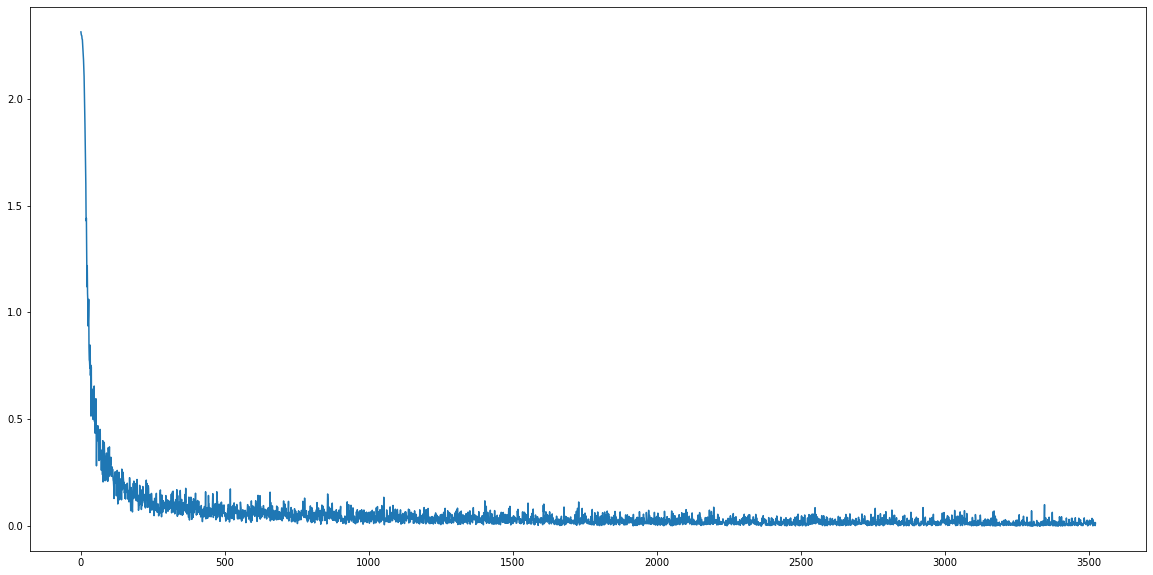

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(train_loss)